In [1]:
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import sklearn 
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from io import StringIO
import sklearn.tree as tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from time import time
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import sklearn 
import graphviz
from surprise import Dataset
from surprise.model_selection import cross_validate
import os
from surprise import Reader
import numpy as np
from surprise import KNNBasic, SVD, NMF
import matplotlib.pyplot as p

In [2]:
data=pd.read_csv('ratings_small.csv')
# rating.drop('timestamp')
# file_path = os.path.expanduser('ratings.csv')
# reader = Reader(line_format='user item rating timestamp', sep='\t')
reader = Reader(rating_scale=(1, 5))
rating = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [3]:
# rating = rating.drop('timestamp',axis=1)
print(rating)

In [4]:
print(rating)

In [5]:
n_cv = 5


In [7]:
#algo_SVD = SVD()
result_SVD = cross_validate(SVD(biased=False), rating, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0132  1.0093  0.9954  1.0089  1.0129  1.0079  0.0065  
MAE (testset)     0.7830  0.7800  0.7663  0.7795  0.7816  0.7781  0.0060  
Fit time          5.94    6.89    5.07    6.11    6.09    6.02    0.58    
Test time         0.17    0.21    0.13    0.16    0.21    0.18    0.03    


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9688  0.9721  0.9674  0.9704  0.9661  0.9689  0.0021  
MAE (testset)     0.7442  0.7448  0.7414  0.7488  0.7425  0.7443  0.0025  
Fit time          0.26    0.28    0.29    0.48    0.22    0.31    0.09    
Test time         2.20    2.42    2.04    2.14    1.69    2.10    0.24    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

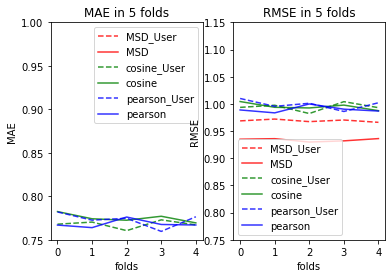

<Figure size 432x288 with 0 Axes>

In [8]:
sim = ['MSD','cosine','pearson']
color = ['r','g','b']
rmse_compare = []
mae_compare = []
fig, ax = plt.subplots(1,2)
for ix,(i,c) in enumerate(zip(sim,color)):
    algo_user = KNNBasic(sim_options = {'name':i,'user_based': True})
    result_KNN_user = cross_validate(algo_user, rating, measures=['RMSE', 'MAE'], cv=5,verbose=True)
    algo = KNNBasic(sim_options = {'name':i,'user_based': False})
    result_KNN = cross_validate(algo, rating, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    plt.plot()
    rmse_compare.append([result_KNN_user['test_rmse'],result_KNN['test_rmse']])
    mae_compare.append([result_KNN_user['test_mae'],result_KNN['test_mae']])
    ax[0].plot(result_KNN_user['test_mae'], '--', color = c, alpha =.8, label = i+'_User')
    ax[1].plot(result_KNN_user['test_rmse'], '--', color = c, alpha =.8, label = i+'_User')
    ax[0].plot(result_KNN['test_mae'], color = c, alpha =.8, label = i)
    ax[1].plot(result_KNN['test_rmse'], color = c, alpha =.8, label = i)

print('For User based collaborative RecSys, Least RMSE - {} and MAE - {} on Fold -{}'.format(np.array(rmse_compare)[:,0].min(), np.array(mae_compare)[:,0].min(),np.array(rmse_compare)[:,0].argmin()+1))

print('For Item based collaborative RecSys, Least RMSE - {} and MAE - {} on Fold -{}'.format(np.array(rmse_compare)[:,1].min(),np.array(mae_compare)[:,1].min(),np.array(rmse_compare)[:,1].argmin()+1))

ax[0].set_ylim([.75,0.80])
ax[1].set_ylim([.75,1.15])
ax[0].legend()
ax[0].set_title('MAE in 5 folds')
ax[0].set_ylabel('MAE')
ax[0].set_xlabel('folds')
ax[1].legend()
ax[1].set_title('RMSE in 5 folds')
ax[1].set_ylabel('RMSE')
ax[1].set_xlabel('folds')
plt.show()
plt.savefig('Similarity.png')


k value is   
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2094  1.2100  1.2145  1.2013  1.2211  1.2113  0.0065  
MAE (testset)     0.9010  0.9025  0.9042  0.8958  0.9101  0.9027  0.0047  
Fit time          0.15    0.19    0.19    0.19    0.20    0.18    0.02    
Test time         0.66    0.63    0.87    0.68    0.83    0.74    0.10    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9737  0.9710  0.9814  0.9951  0.9721  0.9787  0.0090  
MAE (testset)     0.7462  0.7422  0.7522  0.7560  0.7428  0.7479  0.0054  
Fit time          0.18    0.18    0.19    0.19    0.18    0.18    0.00    
Test time         0.99    0.97    0.98    0.92    1.01    0.97    0.03    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9670  0.9635  0.9642  0.9594  0.9695  0.9647  0.0034  
MAE (testset)     0.7385  0.7361  0.7401  0.7352  0.7440  0.7388  0.0031  
Fit time          0.17    0.19    0.19    0.19    0.19    0.19    0.01    
Test time         1.02    1.03    1.05    1.04    1.11    1.05    0.03    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9511  0.9562  0.9565  0.9506  0.9582  0.9545  0.0031  
MAE (testset)     0.7354  0.7378  0.7395  0.7370  0.7418  0.7383  0.0022  
Fit time          3.07    3.20    3.09    3.20    3.11    3.14    0.06    
Test time         4.80    5.03    5.04    4.96    4.96    4.96    0.09    
k value is   
17
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comp

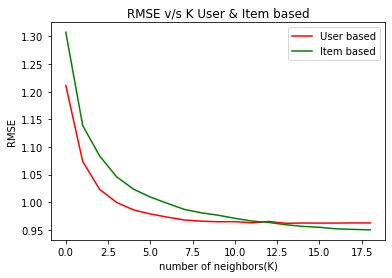

<built-in function array>
User Based collaborative min @ K =37	 RMSE=0.9497352615722298
Item Based collaborative min @ K =37	 RMSE=0.9497352615722298


In [17]:
plot_val = []
for i in range(1,20):
    k_val = i
    print('k value is   ')
    print(i)
    algo = KNNBasic(k=k_val, sim_options = {'name':'MSD', 'user_based': True })
    result_algo_1 = cross_validate(algo, rating, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    algo = KNNBasic(k=k_val, sim_options = {'name':'MSD', 'user_based': False })
    result_algo_2 = cross_validate(algo, rating, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    plot_val.append(np.array([np.average(result_algo_1['test_rmse']),np.average(result_algo_2['test_rmse'])]))

plt.plot(np.array(plot_val)[:,0], color ='r', label='User based')
plt.plot(np.array(plot_val)[:,1], color ='g', label='Item based')
plt.xlabel('number of neighbors(K)')                                                                                          
plt.ylabel('RMSE')
plt.title('RMSE v/s K User & Item based')
plt.legend()
plt.savefig('K_vs_RMSE.png')
plt.show()

print(np.array)

print('User Based collaborative min @ K ={}\t RMSE={}'.format(np.array(plot_val)[:].argmin(),np.array(plot_val)[:].min()))
      
print('Item Based collaborative min @ K ={}\t RMSE={}'.format(np.array(plot_val)[:].argmin(),np.array(plot_val)[:].min()))      